In [46]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import pickle

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
from keras import regularizers

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10
from keras.datasets import mnist



In [47]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
X_train = x_train
X_test = x_test
Y_train = y_train
Y_test = y_test

(60000, 784)
(10000, 784)


In [48]:
noofclasses = 10
def y_train_categorical(Y_train,numberofclasses):
  Y_train = np_utils.to_categorical(Y_train,numberofclasses)
  return Y_train
def y_test_categorical(Y_test,numberofclasses):
  Y_test = np_utils.to_categorical(Y_test,numberofclasses)
  return Y_test
Y_train = y_train_categorical(Y_train,10)
Y_test = y_test_categorical(Y_test,10)


In [49]:
X_train /= 255
X_test /= 255

# **PART 1**

##  **USING ADAM**

In [50]:
def base_model():
  model = Sequential()
  model.add(Dense(350, input_dim=784, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=30, verbose=2, validation_split=0.2)

Epoch 1/30
192/192 - 3s - loss: 1.6684 - accuracy: 0.4694 - val_loss: 0.9288 - val_accuracy: 0.7243
Epoch 2/30
192/192 - 2s - loss: 0.7559 - accuracy: 0.7696 - val_loss: 0.6001 - val_accuracy: 0.8253
Epoch 3/30
192/192 - 2s - loss: 0.5591 - accuracy: 0.8322 - val_loss: 0.4697 - val_accuracy: 0.8648
Epoch 4/30
192/192 - 2s - loss: 0.4553 - accuracy: 0.8673 - val_loss: 0.3970 - val_accuracy: 0.8867
Epoch 5/30
192/192 - 2s - loss: 0.3929 - accuracy: 0.8871 - val_loss: 0.3531 - val_accuracy: 0.8999
Epoch 6/30
192/192 - 2s - loss: 0.3580 - accuracy: 0.8966 - val_loss: 0.3271 - val_accuracy: 0.9052
Epoch 7/30
192/192 - 2s - loss: 0.3340 - accuracy: 0.9040 - val_loss: 0.3078 - val_accuracy: 0.9113
Epoch 8/30
192/192 - 2s - loss: 0.3179 - accuracy: 0.9088 - val_loss: 0.2940 - val_accuracy: 0.9144
Epoch 9/30
192/192 - 2s - loss: 0.3033 - accuracy: 0.9128 - val_loss: 0.2834 - val_accuracy: 0.9178
Epoch 10/30
192/192 - 2s - loss: 0.2907 - accuracy: 0.9162 - val_loss: 0.2728 - val_accuracy: 0.9215

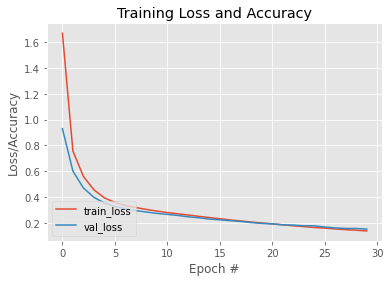

In [52]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 30)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
decoded_imgs = mlp.predict(X_train)



In [53]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.1508 - accuracy: 0.9552
Test results - Loss: 0.15080922842025757 - Accuracy: 0.9552000164985657%


## **USING RMSprop**

In [ ]:
def base_model():
  model = Sequential()
  model.add(Dense(350, input_dim=784, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=30, verbose=2, validation_split=0.2)

Epoch 1/20
192/192 - 3s - loss: 1.7027 - accuracy: 0.5026 - val_loss: 1.0623 - val_accuracy: 0.6862
Epoch 2/20
192/192 - 2s - loss: 0.8195 - accuracy: 0.7631 - val_loss: 0.6110 - val_accuracy: 0.8344
Epoch 3/20
192/192 - 2s - loss: 0.5378 - accuracy: 0.8487 - val_loss: 0.4316 - val_accuracy: 0.8836
Epoch 4/20
192/192 - 2s - loss: 0.4197 - accuracy: 0.8808 - val_loss: 0.3656 - val_accuracy: 0.8967
Epoch 5/20
192/192 - 2s - loss: 0.3726 - accuracy: 0.8944 - val_loss: 0.3380 - val_accuracy: 0.9038
Epoch 6/20
192/192 - 2s - loss: 0.3479 - accuracy: 0.9002 - val_loss: 0.3126 - val_accuracy: 0.9078
Epoch 7/20
192/192 - 2s - loss: 0.3301 - accuracy: 0.9046 - val_loss: 0.3012 - val_accuracy: 0.9143
Epoch 8/20
192/192 - 2s - loss: 0.3147 - accuracy: 0.9095 - val_loss: 0.2876 - val_accuracy: 0.9178
Epoch 9/20
192/192 - 2s - loss: 0.3012 - accuracy: 0.9126 - val_loss: 0.2904 - val_accuracy: 0.9164
Epoch 10/20
192/192 - 2s - loss: 0.2882 - accuracy: 0.9172 - val_loss: 0.2628 - val_accuracy: 0.9229

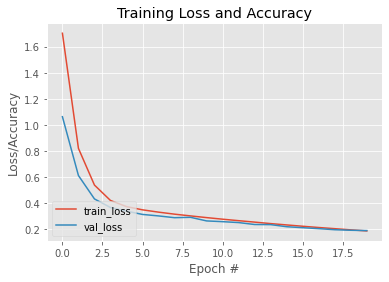

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 20)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1899 - accuracy: 0.9445
Test results - Loss: 0.18986323475837708 - Accuracy: 0.9445000290870667%


## **USING SGD WITH MOMENTUM**

In [ ]:
def base_model():
  model = Sequential()
  model.add(Dense(350, input_dim=784, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax')) 
  sgd = SGD(lr = 0.01, decay=1e-6, momentum=0.9 ,nesterov=True)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
192/192 - 2s - loss: 2.2994 - accuracy: 0.1205 - val_loss: 2.2997 - val_accuracy: 0.1060
Epoch 2/100
192/192 - 2s - loss: 2.2985 - accuracy: 0.1140 - val_loss: 2.2991 - val_accuracy: 0.1060
Epoch 3/100
192/192 - 2s - loss: 2.2979 - accuracy: 0.1140 - val_loss: 2.2984 - val_accuracy: 0.1060
Epoch 4/100
192/192 - 2s - loss: 2.2974 - accuracy: 0.1140 - val_loss: 2.2980 - val_accuracy: 0.1060
Epoch 5/100
192/192 - 2s - loss: 2.2967 - accuracy: 0.1140 - val_loss: 2.2970 - val_accuracy: 0.1060
Epoch 6/100
192/192 - 2s - loss: 2.2958 - accuracy: 0.1140 - val_loss: 2.2962 - val_accuracy: 0.1265
Epoch 7/100
192/192 - 2s - loss: 2.2952 - accuracy: 0.1168 - val_loss: 2.2954 - val_accuracy: 0.1060
Epoch 8/100
192/192 - 2s - loss: 2.2942 - accuracy: 0.1168 - val_loss: 2.2948 - val_accuracy: 0.1060
Epoch 9/100
192/192 - 2s - loss: 2.2932 - accuracy: 0.1140 - val_loss: 2.2932 - val_accuracy: 0.1060
Epoch 10/100
192/192 - 2s - loss: 2.2920 - accuracy: 0.1141 - val_loss: 2.2919 - val_accura

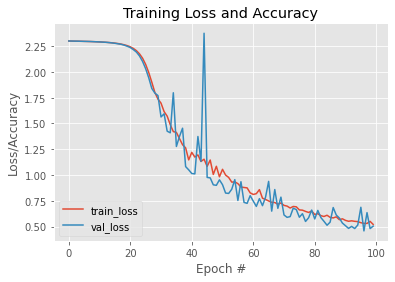

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 100)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.5079 - accuracy: 0.8381
Test results - Loss: 0.5078820586204529 - Accuracy: 0.838100016117096%


## **USING SGD WIHOUT MOMENTUM**

In [ ]:
def base_model():
  model = Sequential()
  model.add(Dense(350, input_dim=784, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax')) 
  sgd = SGD(lr = 0.01, decay=1e-6, momentum=0,nesterov=True)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
192/192 - 2s - loss: 2.3002 - accuracy: 0.1312 - val_loss: 2.2996 - val_accuracy: 0.1060
Epoch 2/100
192/192 - 2s - loss: 2.2990 - accuracy: 0.1140 - val_loss: 2.2993 - val_accuracy: 0.1060
Epoch 3/100
192/192 - 2s - loss: 2.2987 - accuracy: 0.1140 - val_loss: 2.2993 - val_accuracy: 0.1060
Epoch 4/100
192/192 - 2s - loss: 2.2985 - accuracy: 0.1140 - val_loss: 2.2992 - val_accuracy: 0.1060
Epoch 5/100
192/192 - 2s - loss: 2.2983 - accuracy: 0.1140 - val_loss: 2.2991 - val_accuracy: 0.1060
Epoch 6/100
192/192 - 2s - loss: 2.2982 - accuracy: 0.1140 - val_loss: 2.2991 - val_accuracy: 0.1060
Epoch 7/100
192/192 - 2s - loss: 2.2981 - accuracy: 0.1140 - val_loss: 2.2990 - val_accuracy: 0.1060
Epoch 8/100
192/192 - 2s - loss: 2.2981 - accuracy: 0.1140 - val_loss: 2.2990 - val_accuracy: 0.1060
Epoch 9/100
192/192 - 2s - loss: 2.2980 - accuracy: 0.1140 - val_loss: 2.2989 - val_accuracy: 0.1060
Epoch 10/100
192/192 - 2s - loss: 2.2979 - accuracy: 0.1140 - val_loss: 2.2988 - val_accura

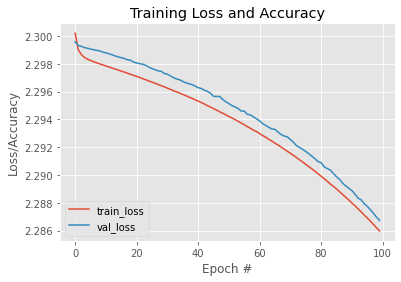

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 100)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 2.2855 - accuracy: 0.1135
Test results - Loss: 2.2854862213134766 - Accuracy: 0.11349999904632568%


## **XAVIER WEIGHT INITIALIZATION ON ADAM MODEL AS IT'S BEST**

In [ ]:
def base_model():
  model = Sequential()
  model.add(Dense(350,kernel_initializer='glorot_normal', input_dim=784, activation='relu'))
  model.add(Dense(50, kernel_initializer = 'glorot_normal',activation='relu'))
  model.add(Dense(10,activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
192/192 - 2s - loss: 1.6513 - accuracy: 0.5466 - val_loss: 0.9031 - val_accuracy: 0.7467
Epoch 2/20
192/192 - 2s - loss: 0.7426 - accuracy: 0.7783 - val_loss: 0.5843 - val_accuracy: 0.8388
Epoch 3/20
192/192 - 2s - loss: 0.5313 - accuracy: 0.8453 - val_loss: 0.4377 - val_accuracy: 0.8752
Epoch 4/20
192/192 - 2s - loss: 0.4267 - accuracy: 0.8780 - val_loss: 0.3667 - val_accuracy: 0.8967
Epoch 5/20
192/192 - 2s - loss: 0.3722 - accuracy: 0.8943 - val_loss: 0.3297 - val_accuracy: 0.9068
Epoch 6/20
192/192 - 2s - loss: 0.3425 - accuracy: 0.9030 - val_loss: 0.3099 - val_accuracy: 0.9103
Epoch 7/20
192/192 - 2s - loss: 0.3222 - accuracy: 0.9079 - val_loss: 0.2915 - val_accuracy: 0.9162
Epoch 8/20
192/192 - 2s - loss: 0.3062 - accuracy: 0.9122 - val_loss: 0.2797 - val_accuracy: 0.9191
Epoch 9/20
192/192 - 2s - loss: 0.2935 - accuracy: 0.9154 - val_loss: 0.2735 - val_accuracy: 0.9213
Epoch 10/20
192/192 - 2s - loss: 0.2823 - accuracy: 0.9189 - val_loss: 0.2590 - val_accuracy: 0.9250

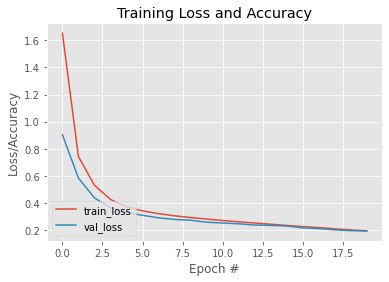

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 20)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1979 - accuracy: 0.9426
Test results - Loss: 0.1978972852230072 - Accuracy: 0.9426000118255615%


## **UNIFORM INITIALIZATION ON ADAM** 

In [ ]:
def base_model():
  model = Sequential()
  model.add(Dense(350,kernel_initializer='random_uniform', input_dim=784, activation='relu'))
  model.add(Dense(50, kernel_initializer = 'random_uniform',activation='relu'))
  model.add(Dense(10,activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
192/192 - 2s - loss: 1.7894 - accuracy: 0.3743 - val_loss: 1.1231 - val_accuracy: 0.6172
Epoch 2/20
192/192 - 2s - loss: 0.8936 - accuracy: 0.7226 - val_loss: 0.6716 - val_accuracy: 0.8130
Epoch 3/20
192/192 - 2s - loss: 0.5948 - accuracy: 0.8269 - val_loss: 0.4845 - val_accuracy: 0.8657
Epoch 4/20
192/192 - 2s - loss: 0.4726 - accuracy: 0.8639 - val_loss: 0.4071 - val_accuracy: 0.8862
Epoch 5/20
192/192 - 2s - loss: 0.4092 - accuracy: 0.8813 - val_loss: 0.3704 - val_accuracy: 0.8923
Epoch 6/20
192/192 - 2s - loss: 0.3730 - accuracy: 0.8925 - val_loss: 0.3415 - val_accuracy: 0.8988
Epoch 7/20
192/192 - 2s - loss: 0.3504 - accuracy: 0.8986 - val_loss: 0.3239 - val_accuracy: 0.9049
Epoch 8/20
192/192 - 2s - loss: 0.3354 - accuracy: 0.9039 - val_loss: 0.3151 - val_accuracy: 0.9093
Epoch 9/20
192/192 - 2s - loss: 0.3229 - accuracy: 0.9064 - val_loss: 0.3031 - val_accuracy: 0.9120
Epoch 10/20
192/192 - 2s - loss: 0.3135 - accuracy: 0.9087 - val_loss: 0.2962 - val_accuracy: 0.9137

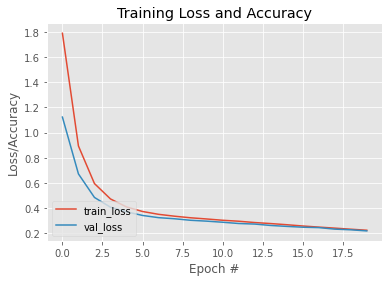

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 20)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2263 - accuracy: 0.9328
Test results - Loss: 0.2263175994157791 - Accuracy: 0.9327999949455261%


## **NORMAL INITIALIZATION ON ADAM**



In [ ]:
def base_model():
  model = Sequential()
  model.add(Dense(350,kernel_initializer='random_normal', input_dim=784, activation='relu'))
  model.add(Dense(50, kernel_initializer = 'random_normal',activation='relu'))
  model.add(Dense(10,activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
192/192 - 3s - loss: 1.6736 - accuracy: 0.5154 - val_loss: 0.8991 - val_accuracy: 0.7369
Epoch 2/20
192/192 - 2s - loss: 0.7227 - accuracy: 0.7850 - val_loss: 0.5672 - val_accuracy: 0.8390
Epoch 3/20
192/192 - 2s - loss: 0.5374 - accuracy: 0.8428 - val_loss: 0.4625 - val_accuracy: 0.8680
Epoch 4/20
192/192 - 2s - loss: 0.4525 - accuracy: 0.8690 - val_loss: 0.3990 - val_accuracy: 0.8840
Epoch 5/20
192/192 - 2s - loss: 0.4009 - accuracy: 0.8847 - val_loss: 0.3596 - val_accuracy: 0.8941
Epoch 6/20
192/192 - 2s - loss: 0.3669 - accuracy: 0.8956 - val_loss: 0.3347 - val_accuracy: 0.9042
Epoch 7/20
192/192 - 2s - loss: 0.3419 - accuracy: 0.9024 - val_loss: 0.3156 - val_accuracy: 0.9082
Epoch 8/20
192/192 - 2s - loss: 0.3234 - accuracy: 0.9081 - val_loss: 0.2976 - val_accuracy: 0.9153
Epoch 9/20
192/192 - 2s - loss: 0.3070 - accuracy: 0.9112 - val_loss: 0.2823 - val_accuracy: 0.9187
Epoch 10/20
192/192 - 2s - loss: 0.2932 - accuracy: 0.9154 - val_loss: 0.2734 - val_accuracy: 0.9203

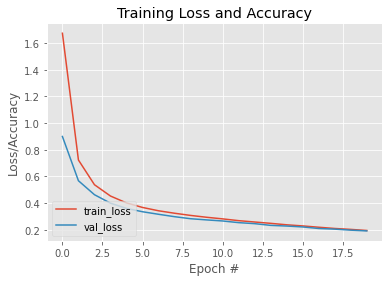

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 20)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1963 - accuracy: 0.9444
Test results - Loss: 0.1962658166885376 - Accuracy: 0.9444000124931335%


## **CHANGING LEARNING RATE OF ADAM TO 0.001 AND providing Exponential Annealing**

In [ ]:
def base_model():
  model = Sequential()
  model.add(Dense(350,kernel_initializer='random_normal', input_dim=784, activation='relu'))
  model.add(Dense(50, kernel_initializer = 'random_normal',activation='relu'))
  model.add(Dense(10,activation='softmax')) 
  adm = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
  model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
192/192 - 2s - loss: 1.6902 - accuracy: 0.5155 - val_loss: 0.9754 - val_accuracy: 0.7325
Epoch 2/20
192/192 - 2s - loss: 0.7624 - accuracy: 0.7755 - val_loss: 0.5764 - val_accuracy: 0.8438
Epoch 3/20
192/192 - 2s - loss: 0.5206 - accuracy: 0.8504 - val_loss: 0.4253 - val_accuracy: 0.8856
Epoch 4/20
192/192 - 2s - loss: 0.4122 - accuracy: 0.8846 - val_loss: 0.3560 - val_accuracy: 0.9016
Epoch 5/20
192/192 - 2s - loss: 0.3624 - accuracy: 0.8967 - val_loss: 0.3362 - val_accuracy: 0.9050
Epoch 6/20
192/192 - 2s - loss: 0.3379 - accuracy: 0.9038 - val_loss: 0.3091 - val_accuracy: 0.9107
Epoch 7/20
192/192 - 2s - loss: 0.3193 - accuracy: 0.9087 - val_loss: 0.2939 - val_accuracy: 0.9169
Epoch 8/20
192/192 - 2s - loss: 0.3062 - accuracy: 0.9124 - val_loss: 0.2814 - val_accuracy: 0.9192
Epoch 9/20
192/192 - 2s - loss: 0.2943 - accuracy: 0.9163 - val_loss: 0.2724 - val_accuracy: 0.9223
Epoch 10/20
192/192 - 2s - loss: 0.2849 - accuracy: 0.9183 - val_loss: 0.2668 - val_accuracy: 0.9232

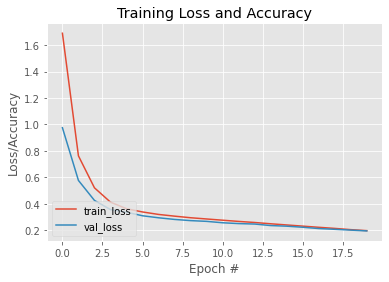

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 20)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1976 - accuracy: 0.9434
Test results - Loss: 0.19761928915977478 - Accuracy: 0.9434000253677368%


## **CHANGING LEARNING RATE OF ADAM TO 0.0005 AND providing Exponential Annealing**

In [ ]:
def base_model():
  model = Sequential()
  model.add(Dense(350,kernel_initializer='random_normal', input_dim=784, activation='relu'))
  model.add(Dense(50, kernel_initializer = 'random_normal',activation='relu'))
  model.add(Dense(10,activation='softmax')) 
  adm = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
  model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
192/192 - 2s - loss: 2.0114 - accuracy: 0.4598 - val_loss: 1.4266 - val_accuracy: 0.6598
Epoch 2/20
192/192 - 2s - loss: 1.0560 - accuracy: 0.7069 - val_loss: 0.7887 - val_accuracy: 0.7747
Epoch 3/20
192/192 - 2s - loss: 0.6982 - accuracy: 0.8026 - val_loss: 0.5804 - val_accuracy: 0.8496
Epoch 4/20
192/192 - 2s - loss: 0.5446 - accuracy: 0.8523 - val_loss: 0.4673 - val_accuracy: 0.8742
Epoch 5/20
192/192 - 2s - loss: 0.4620 - accuracy: 0.8723 - val_loss: 0.4102 - val_accuracy: 0.8839
Epoch 6/20
192/192 - 2s - loss: 0.4166 - accuracy: 0.8831 - val_loss: 0.3761 - val_accuracy: 0.8926
Epoch 7/20
192/192 - 2s - loss: 0.3892 - accuracy: 0.8901 - val_loss: 0.3577 - val_accuracy: 0.8968
Epoch 8/20
192/192 - 2s - loss: 0.3699 - accuracy: 0.8947 - val_loss: 0.3406 - val_accuracy: 0.9023
Epoch 9/20
192/192 - 2s - loss: 0.3550 - accuracy: 0.8991 - val_loss: 0.3271 - val_accuracy: 0.9065
Epoch 10/20
192/192 - 2s - loss: 0.3424 - accuracy: 0.9026 - val_loss: 0.3175 - val_accuracy: 0.9084

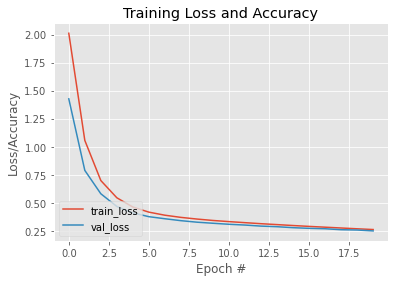

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 20)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2564 - accuracy: 0.9279
Test results - Loss: 0.25640732049942017 - Accuracy: 0.9279000163078308%


## **CHANGING LEARNING RATE OF ADAM TO 0.00015 AND providing Exponential Annealing**

In [ ]:
def base_model():
  model = Sequential()
  model.add(Dense(350,kernel_initializer='random_normal', input_dim=784, activation='relu'))
  model.add(Dense(50, kernel_initializer = 'random_normal',activation='relu'))
  model.add(Dense(10,activation='softmax')) 
  adm = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
  model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(X_train, Y_train, batch_size=250, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
192/192 - 2s - loss: 1.9922 - accuracy: 0.4574 - val_loss: 1.4130 - val_accuracy: 0.6209
Epoch 2/20
192/192 - 2s - loss: 1.0689 - accuracy: 0.7058 - val_loss: 0.7982 - val_accuracy: 0.7928
Epoch 3/20
192/192 - 2s - loss: 0.7130 - accuracy: 0.7968 - val_loss: 0.5956 - val_accuracy: 0.8358
Epoch 4/20
192/192 - 2s - loss: 0.5730 - accuracy: 0.8321 - val_loss: 0.5028 - val_accuracy: 0.8580
Epoch 5/20
192/192 - 2s - loss: 0.4948 - accuracy: 0.8556 - val_loss: 0.4390 - val_accuracy: 0.8752
Epoch 6/20
192/192 - 2s - loss: 0.4428 - accuracy: 0.8714 - val_loss: 0.3998 - val_accuracy: 0.8865
Epoch 7/20
192/192 - 2s - loss: 0.4068 - accuracy: 0.8832 - val_loss: 0.3717 - val_accuracy: 0.8930
Epoch 8/20
192/192 - 2s - loss: 0.3821 - accuracy: 0.8904 - val_loss: 0.3518 - val_accuracy: 0.8983
Epoch 9/20
192/192 - 2s - loss: 0.3637 - accuracy: 0.8950 - val_loss: 0.3371 - val_accuracy: 0.9020
Epoch 10/20
192/192 - 2s - loss: 0.3490 - accuracy: 0.8990 - val_loss: 0.3267 - val_accuracy: 0.9065

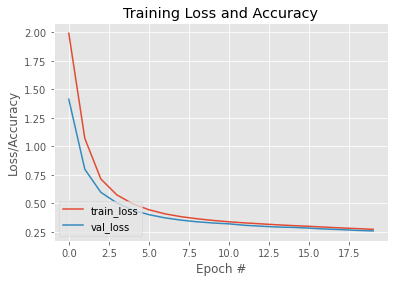

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 20)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [ ]:
test_results = mlp.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.2661 - accuracy: 0.9228
Test results - Loss: 0.2661362290382385 - Accuracy: 0.9228000044822693%


**ACCURACY WHEN LEARNING RATE IS DEFAULT - 0.947**

**ACCURACY WHEN LEARNING RATE IS 0.001 WITH EXPONENTIAL ANNEALING = 0.942**

**ACCURACY WHEN LEARNING RATE IS 0.0005 WTH EXPONENTIAL ANNEALING = 0.925**

**ACCURACY WHEN LEARNING RATE IS 0.00015 WITH EXPONENTIAL ANNEALING = 0.921**

# **PART 2**

In [54]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [55]:
noofclasses = 10
def y_train_categorical(Y_train,numberofclasses):
  Y_train = np_utils.to_categorical(Y_train,numberofclasses)
  return Y_train
def y_test_categorical(Y_test,numberofclasses):
  Y_test = np_utils.to_categorical(Y_test,numberofclasses)
  return Y_test
Y_train = y_train_categorical(y_train,10)
Y_test = y_test_categorical(y_test,10)


In [56]:
encoder_input = keras.Input(shape=(28, 28, 1))
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(16, activation="relu")(x) 
x = keras.layers.Dense(784, activation="relu")(encoder_output)
decoder_output = keras.layers.Reshape((28, 28))(x)
encoder = keras.Model(encoder_input, encoder_output)
autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile('adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128)  
bottleneck = encoder.predict(x_train)
bottleneck = bottleneck.reshape(60000,4,4,1)
bottleneck1 = encoder.predict(x_test)
bottleneck1 = bottleneck1.reshape(10000,4,4,1)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0552
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0260
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0250
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0247
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0246
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0246
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0246
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0245
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0245
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0245


In [57]:
def base_model():
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(350, input_dim=784, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax')) 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model 
mlp = base_model()
history = mlp.fit(bottleneck, Y_train, batch_size=250, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
192/192 - 1s - loss: 0.6897 - accuracy: 0.8073 - val_loss: 0.3705 - val_accuracy: 0.8896
Epoch 2/20
192/192 - 1s - loss: 0.3373 - accuracy: 0.9003 - val_loss: 0.2773 - val_accuracy: 0.9162
Epoch 3/20
192/192 - 1s - loss: 0.2674 - accuracy: 0.9195 - val_loss: 0.2355 - val_accuracy: 0.9313
Epoch 4/20
192/192 - 1s - loss: 0.2256 - accuracy: 0.9320 - val_loss: 0.1974 - val_accuracy: 0.9416
Epoch 5/20
192/192 - 1s - loss: 0.1986 - accuracy: 0.9405 - val_loss: 0.1929 - val_accuracy: 0.9429
Epoch 6/20
192/192 - 1s - loss: 0.1818 - accuracy: 0.9448 - val_loss: 0.1777 - val_accuracy: 0.9456
Epoch 7/20
192/192 - 1s - loss: 0.1674 - accuracy: 0.9486 - val_loss: 0.1628 - val_accuracy: 0.9508
Epoch 8/20
192/192 - 1s - loss: 0.1571 - accuracy: 0.9513 - val_loss: 0.1526 - val_accuracy: 0.9545
Epoch 9/20
192/192 - 1s - loss: 0.1483 - accuracy: 0.9535 - val_loss: 0.1510 - val_accuracy: 0.9550
Epoch 10/20
192/192 - 1s - loss: 0.1411 - accuracy: 0.9556 - val_loss: 0.1400 - val_accuracy: 0.9589

In [45]:
test_results = mlp.evaluate(bottleneck1, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 0.9598
Test results - Loss: 0.006201213225722313 - Accuracy: 0.9598000049591064%


**ACCURACY BEFORE ENCODING = 0.9525**

**ACCURACY AFTER ENCODING = 0.9598**

The reason for higher accuracy is as the dimension of the image is reduced much less so it works faster and hence the region of mistake is less
